In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

# 01. 데이터 로드

In [4]:
df = pd.read_csv('C:/Users/sjy54/OneDrive - 인하대학교/Son/08. TACTICS/02. 2022 빅콘테스트/02. 분석 파일/dat.csv')
df.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,기타,...,2022-04-20 01:23:10,42,216,3000000.0,14.5,0.0,1,40,0.550685,2
1,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,기타,...,2022-04-20 01:23:09,13,123,1000000.0,19.9,0.0,1,40,0.550685,2
2,256442,614734,1976.0,1.0,2022-04-20 16:13:06,540.0,40000000.0,EARNEDINCOME,2019-08-01,정규직,...,2022-04-20 16:13:09,2,126,30000000.0,17.9,1.0,1,40,2.720548,3
3,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,정규직,...,2022-04-24 16:37:59,19,127,9000000.0,9.4,0.0,1,20,0.980822,2
4,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,정규직,...,2022-04-24 16:37:53,17,19,10000000.0,13.8,0.0,1,20,0.980822,2


In [3]:
df.shape

(8064176, 27)

## 02.1 범주형 피처들의 분포

#### gender

<AxesSubplot:xlabel='gender', ylabel='count'>

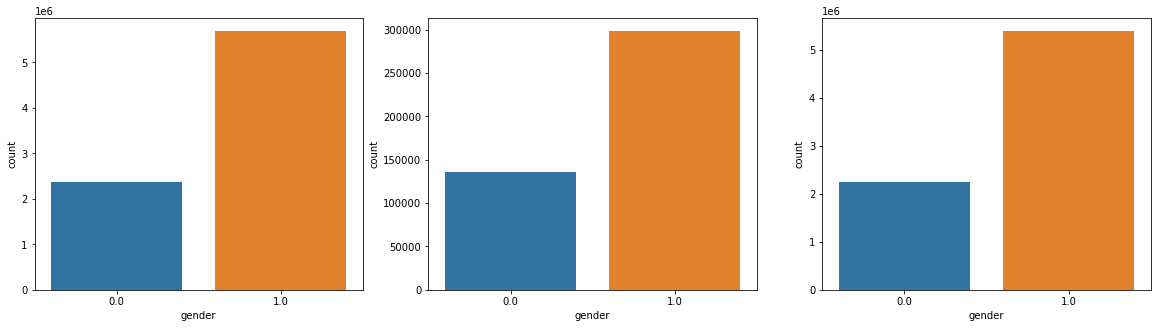

In [13]:
# gender
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

sns.countplot(df['gender'], ax=ax[0])
sns.countplot(df_yes['gender'], ax=ax[1])
sns.countplot(df_no['gender'], ax=ax[2])

- 고객이 남자인지 여자인지는 애초에 남자 고객이 많기 때문에 비교하기 힘듬
- 0 : 여자 / 1 : 남자
- 여자보다 남자가 훨씬 많다

<AxesSubplot:xlabel='age', ylabel='count'>

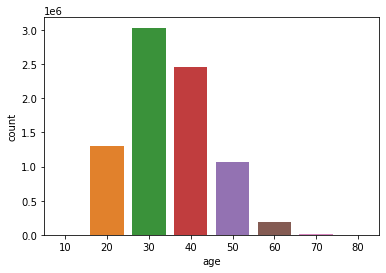

In [18]:
sns.countplot(df['age'])

<AxesSubplot:xlabel='work_rank', ylabel='count'>

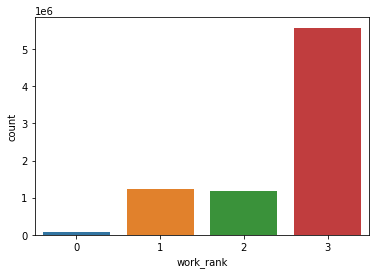

In [19]:
sns.countplot(df['work_rank'])

<AxesSubplot:xlabel='income_type', ylabel='count'>

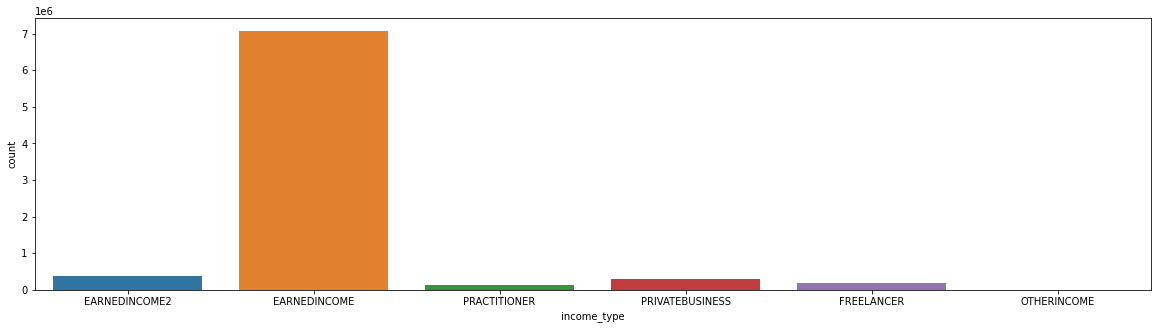

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(df['income_type'])

#### employment_type

In [15]:
# employment_type
df['employment_type'].value_counts()

정규직    6801726
계약직     730693
기타      415848
일용직     115909
Name: employment_type, dtype: int64

In [3]:
# 한글 그래프 깨져서 영어로 변경
mapping_type={'정규직':'Full_time','계약직':'Contract','기타':'etc','일용직':'day_labor'}
df = df.replace({'employment_type': mapping_type})
df

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,etc,...,2022-04-20 01:23:10,42,216,3000000.0,14.5,0.0,1,40,0.550685,2
1,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,EARNEDINCOME2,2021-10-01,etc,...,2022-04-20 01:23:09,13,123,1000000.0,19.9,0.0,1,40,0.550685,2
2,256442,614734,1976.0,1.0,2022-04-20 16:13:06,540.0,40000000.0,EARNEDINCOME,2019-08-01,Full_time,...,2022-04-20 16:13:09,2,126,30000000.0,17.9,1.0,1,40,2.720548,3
3,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,Full_time,...,2022-04-24 16:37:59,19,127,9000000.0,9.4,0.0,1,20,0.980822,2
4,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,36000000.0,EARNEDINCOME,2021-05-01,Full_time,...,2022-04-24 16:37:53,17,19,10000000.0,13.8,0.0,1,20,0.980822,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064171,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,2017-08-01,Full_time,...,2022-04-03 18:58:33,7,220,7000000.0,14.5,0.0,0,30,4.673973,3
8064172,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,2017-08-01,Full_time,...,2022-04-03 18:58:33,21,196,3000000.0,13.0,1.0,0,30,4.673973,3
8064173,604558,257179,1985.0,0.0,2022-04-03 18:58:31,620.0,24000000.0,EARNEDINCOME,2017-08-01,Full_time,...,2022-04-03 18:58:33,56,5,6000000.0,15.9,0.0,0,30,4.673973,3
8064174,179711,866226,1967.0,1.0,2022-04-01 10:50:50,500.0,36000000.0,EARNEDINCOME,2021-01-01,Full_time,...,2022-04-01 10:50:52,49,39,8000000.0,16.1,0.0,0,50,1.246575,3


In [20]:
df_yes = df_yes.replace({'employment_type': mapping_type})
df_no = df_no.replace({'employment_type': mapping_type})

<AxesSubplot:xlabel='employment_type', ylabel='count'>

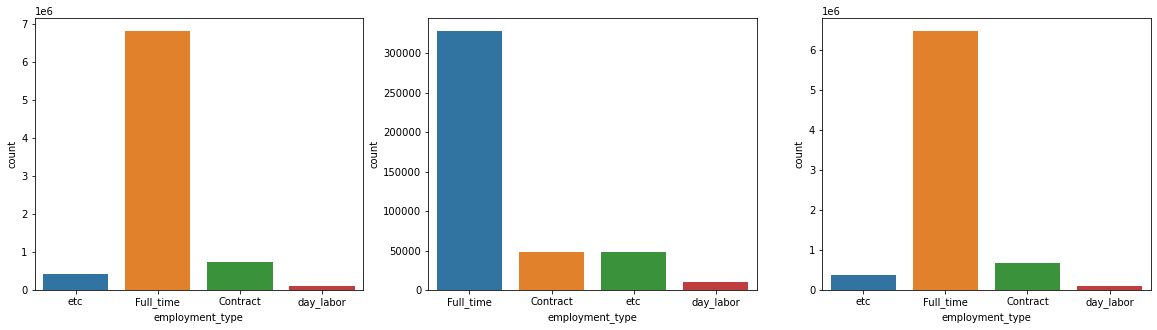

In [21]:
# gender
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

sns.countplot(df['employment_type'], ax=ax[0])
sns.countplot(df_yes['employment_type'], ax=ax[1])
sns.countplot(df_no['employment_type'], ax=ax[2])

#### is_applied

<AxesSubplot:xlabel='is_applied', ylabel='count'>

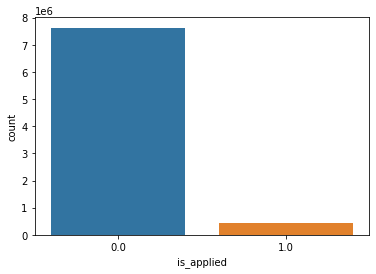

In [21]:
sns.countplot(df['is_applied'])

In [22]:
df['is_applied'].value_counts()

0.0    7629488
1.0     434688
Name: is_applied, dtype: int64

## 02.2 수치형 피처 산점도 타겟 피처

<Figure size 1440x360 with 0 Axes>

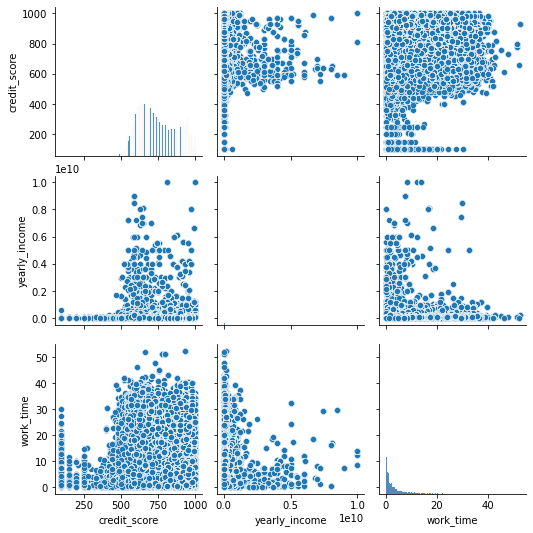

In [24]:
# 사용자와 관련된 수치형 피처만 있는 df 생성
plt.figure(figsize=(20,5))

df_num = df[['credit_score', 'yearly_income', 'work_time']]
sns.pairplot(df_num)

<Figure size 1440x360 with 0 Axes>

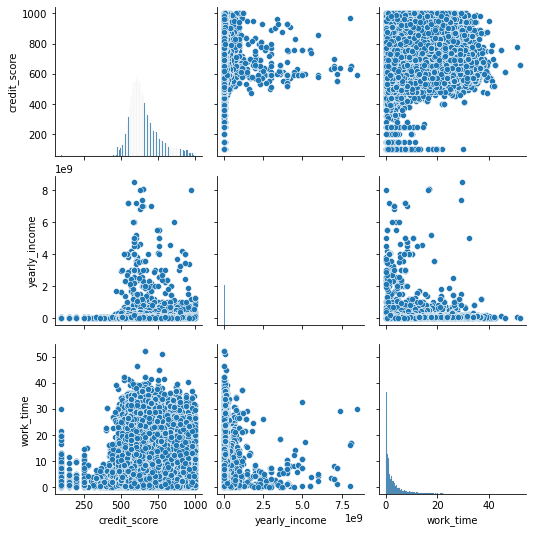

In [25]:
plt.figure(figsize=(20,5))

df_num_yes = df_yes[['credit_score', 'yearly_income', 'work_time']]
sns.pairplot(df_num_yes)

<Figure size 1440x360 with 0 Axes>

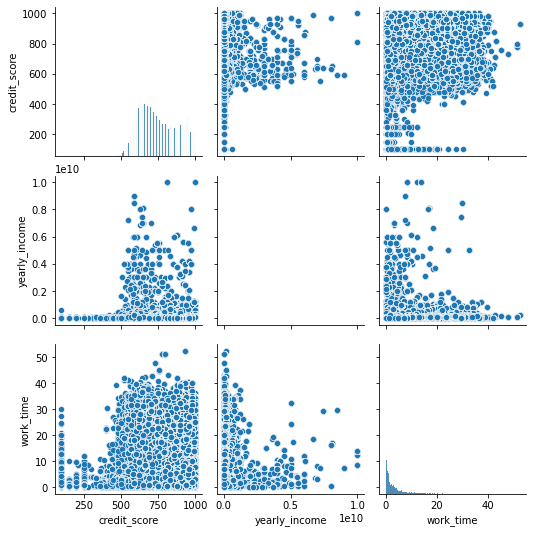

In [26]:
plt.figure(figsize=(20,5))

df_num_no = df_no[['credit_score', 'yearly_income', 'work_time']]
sns.pairplot(df_num_no)

## 02.3 다중공선성

In [32]:
# 수치형 피처에 대한 상관관계 확인
df_num = df[['credit_score','yearly_income','desired_amount','existing_loan_amt','loan_limit','loan_rate','work_time']]
corr = df_num.corr()

<AxesSubplot:>

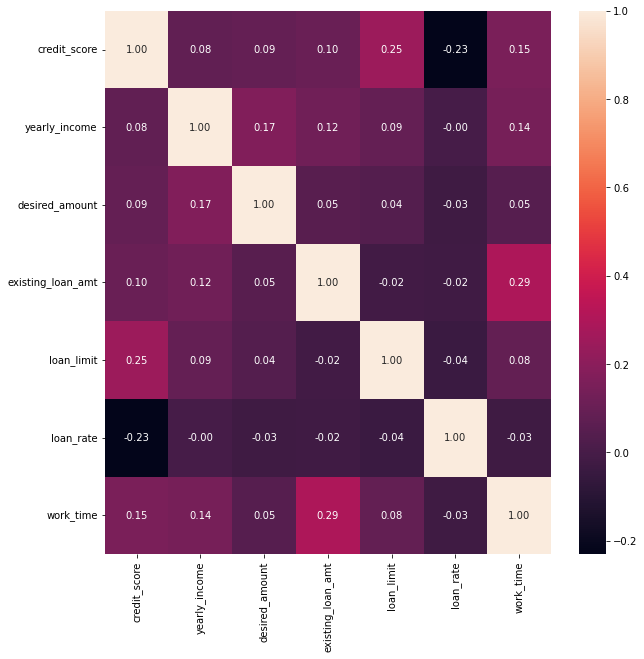

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')

- 수치형 피처 간에는 크게 상관관계가 있는 피처가 없어 보임

In [30]:
# 타겟 피처 포함
df_num = df[['credit_score','yearly_income','desired_amount','existing_loan_amt','loan_limit','loan_rate','work_time', 'is_applied']]
corr = df_num.corr()

<AxesSubplot:>

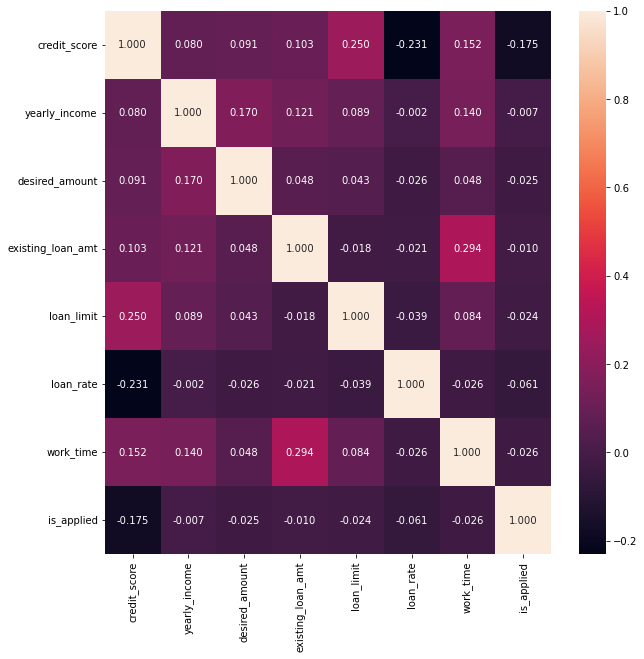

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.3f')

## 02.4 가설 설정
- 대출 승인이 된 사람들은 어떤 사람들일까?
    - 1. 신용도가 높은 사람들
        - 어떤 사람들이 신용도가 높을까?
            - houseown_type, employment_type, yearly_income, income_type 피처의 관계
            - 기대출수가 적고, 기대출액이 낮은 사람    
- 대출 승인이 된 대출 상품은 어떤 상품일까?
    - 1. 승인 한도가 높고, 대출 금리가 낮은 상품
    
- 대출이 거절된 사례에서 정말 대출을 받으려는 사람이 얼마나 될까?
    - 신용도를 확인해보거나, 대출 상품을 둘러보려고 신청 에만 들어간 경우는 어떤 경우일까?
    
- 신청 횟수가 많은 특정 은행의 특정 대출 상품은 어떤 특징이 있을까?

# 03. 추가 전처리

## 03.1 모델 학습에 필요없는 데이터 삭제

In [33]:
df.columns

Index(['application_id', 'user_id', 'birth_year', 'gender', 'credit_score',
       'yearly_income', 'income_type', 'employment_type', 'houseown_type',
       'desired_amount', 'purpose', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt', 'bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'is_applied', 'exloan', 'age', 'work_time', 'work_rank'],
      dtype='object')

- 모델 학습에 불필요한 피처 삭제 : appication_id, user_id, bank_id, product_id, insert_time, loanapply_insert_time, birth_year, company_enter_month

In [5]:
# 모델 학습에 불필요한 피처 삭제
df.drop(['insert_time','loanapply_insert_time', 'company_enter_month','birth_year','application_id','user_id','product_id'], axis=1, inplace=True)

In [6]:
df.drop('bank_id', axis=1, inplace=True)

In [7]:
df.head()

,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1.0,670.0,50000000.0,EARNEDINCOME2,기타,전월세,25000000.0,대환대출,0.0,0.0,3.0,76000000.0,3000000.0,14.5,0.0,1,40,0.550685,2
1,1.0,670.0,50000000.0,EARNEDINCOME2,기타,전월세,25000000.0,대환대출,0.0,0.0,3.0,76000000.0,1000000.0,19.9,0.0,1,40,0.550685,2
2,1.0,540.0,40000000.0,EARNEDINCOME,정규직,전월세,15000000.0,생활비,1.0,0.0,2.0,64000000.0,30000000.0,17.9,1.0,1,40,2.720548,3
3,1.0,710.0,36000000.0,EARNEDINCOME,정규직,기타가족소유,13000000.0,생활비,0.0,0.0,2.0,28000000.0,9000000.0,9.4,0.0,1,20,0.980822,2
4,1.0,710.0,36000000.0,EARNEDINCOME,정규직,기타가족소유,13000000.0,생활비,0.0,0.0,2.0,28000000.0,10000000.0,13.8,0.0,1,20,0.980822,2


- 범주형 피처 : gender, income_type, employment_type, houseown_type, purpose, personal_rehabilitation_yn, personal_rehabilitation_complete_yn, existing_loan_cnt, is_applied, exloan, age, work_rank
- 수치형 피처 : credit_score, yearly_income, desired_amount, existing_loan_amt, loan_limit, loan_rate, work_time
- 라벨 인코딩 수행 : income_type, employment_type, houseown_type, purpose, 

## 03.2 라벨 인코딩

In [33]:
df['income_type'] = df['income_type'].replace({'EARNEDINCOME':1,'EARNEDINCOME2':2,'FREELANCER':3,'OTHERINCOME':4,'PRACTITIONER':5,
                                                'PRIVATEBUSINESS':6}).astype('category')
df['purpose'] = df['purpose'].replace({'대환대출':1,'SWITCHLOAN':1,'생활비':2,'LIVING':2,'주택구입':3,'BUYHOUSE':3,'자동차구입':4,
                                        'BUYCAR':4,'사업자금':5,'BUSINESS':5,'투자':6,'INVEST':6,'전월세보증금':7,'HOUSEDEPOSIT':7,
                                        '기타':8,'ETC':8}).astype('category')
df['houseown_type']=df['houseown_type'].replace({'전월세':1,'자가':2,'배우자':3,'기타가족소유':4}).astype('category')
df['employment_type']=df['employment_type'].replace({'정규직':1,'계약직':2,'일용직':3,'기타':4}).astype('category')

In [40]:
df['age'] = df['age'].replace({10:1, 20:2, 30:3, 40:4, 50:5, 60:6, 70:7, 80:8}).astype('category')

In [41]:
df['age'].value_counts()

3    2377693
4    2024293
2     957039
5     884248
6     154580
7      10326
1        500
8        276
Name: age, dtype: int64

In [42]:
df.head()

,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1.0,670.0,17.727534,2,4,1,17.034386,1,0.0,0.0,3.0,18.146244,14.914123,14.5,0.0,1,4,0.438697,2
2,1.0,540.0,17.504390,1,1,1,16.523561,2,1.0,0.0,2.0,17.974394,17.216708,17.9,1.0,1,4,1.313871,3
3,1.0,710.0,17.399030,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.012735,9.4,0.0,1,2,0.683512,2
4,1.0,710.0,17.399030,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.118096,13.8,0.0,1,2,0.683512,2
5,1.0,710.0,17.399030,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.523561,16.5,0.0,1,2,0.683512,2


## 03.3 메모리 타입 변경

In [50]:
df['personal_rehabilitation_complete_yn'] = df['personal_rehabilitation_complete_yn'].astype('category')
df['is_applied'] = df['is_applied'].astype('category')
df['exloan'] = df['exloan'].astype('category')
df['age'] = df['age'].astype('category')
df['work_rank']=df['work_rank'].astype('category')
df['yearly_income']=df['yearly_income'].astype('float32')
df['desired_amount']=df['desired_amount'].astype('float32')
df['loan_limit']=df['loan_limit'].astype('float32')
df['loan_rate']=df['loan_rate'].astype('float16')
df['credit_score']=df['credit_score'].astype('int16')
df['work_time'] = df['work_time'].astype('float32')
df['existing_loan_amt']=df['existing_loan_amt'].astype('float32')
df['existing_loan_cnt']=df['existing_loan_cnt'].astype('float16')

## 03.4 데이터 스케일링

### 03.4.1 데이터 로그 변환 및 이상치 확인
- 연속형 변수는 boxplot해서 확인

In [13]:
df.head()

,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1.0,670.0,50000000.0,2,4,1,25000000.0,1,0.0,0.0,3.0,76000000.0,3000000.0,14.5,0.0,1,40,0.550685,2
1,1.0,670.0,50000000.0,2,4,1,25000000.0,1,0.0,0.0,3.0,76000000.0,1000000.0,19.9,0.0,1,40,0.550685,2
2,1.0,540.0,40000000.0,1,1,1,15000000.0,2,1.0,0.0,2.0,64000000.0,30000000.0,17.9,1.0,1,40,2.720548,3
3,1.0,710.0,36000000.0,1,1,4,13000000.0,2,0.0,0.0,2.0,28000000.0,9000000.0,9.4,0.0,1,20,0.980822,2
4,1.0,710.0,36000000.0,1,1,4,13000000.0,2,0.0,0.0,2.0,28000000.0,10000000.0,13.8,0.0,1,20,0.980822,2


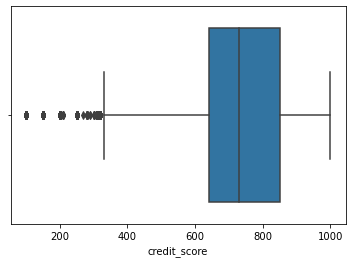

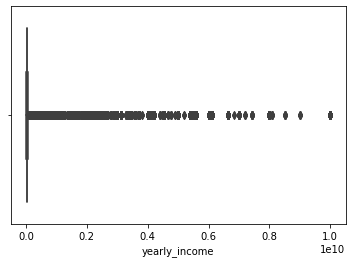

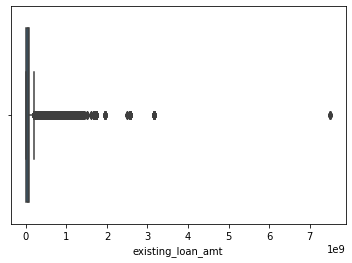

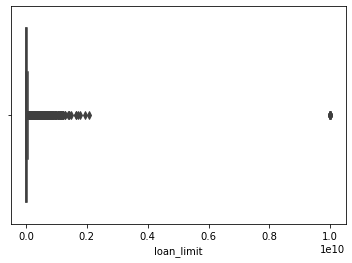

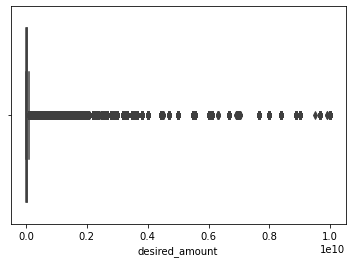

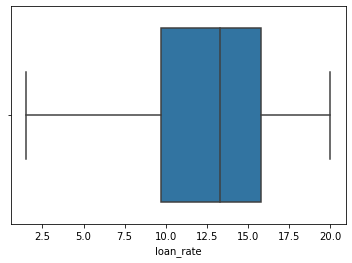

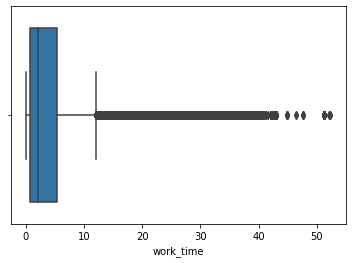

In [12]:
columns = ['credit_score', 'yearly_income', 'existing_loan_amt', 'loan_limit', 'desired_amount', 'loan_rate', 'work_time']

for columns in columns:
    sns.boxplot(x=df[columns], data=df)
    plt.show()

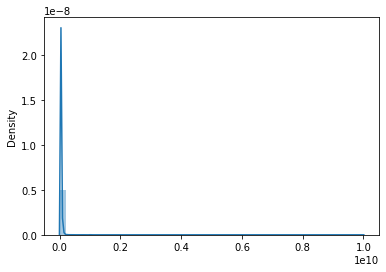

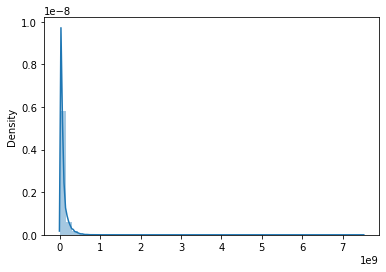

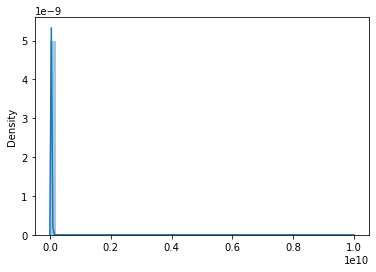

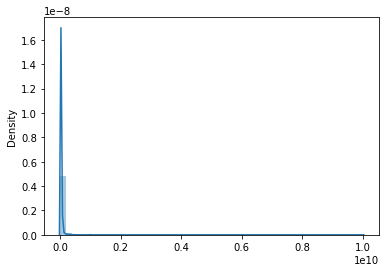

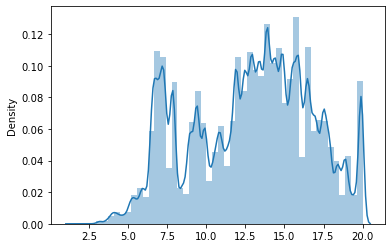

In [13]:
columns = ['yearly_income', 'existing_loan_amt', 'loan_limit', 'desired_amount', 'loan_rate']

# 로그 변환 이전 히스토그램
for columns in columns:
    sns.distplot(x=df[columns])
    plt.show()

In [14]:
# 왜곡 확인
columns = ['credit_score', 'yearly_income', 'existing_loan_amt', 'loan_limit', 'desired_amount', 'loan_rate', 'work_time']

for columns in columns:
    print(df[columns].skew())

0.2515436021720082
51.13001349965083
3.812905768288173
153.9534103347992
31.21217432055288
-0.19298783764964356
2.3841428269823273


yearly_income, existing_loan_amt, loan_limit, desired_amount, work_time의 왜곡도가 높아보임

In [15]:
# 로그 변환
columns = ['yearly_income', 'existing_loan_amt', 'loan_limit', 'desired_amount', 'work_time']

for columns in columns:
    df[columns] = np.log1p(df[columns])

df

,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1.0,670.0,17.727534,2,4,1,17.034386,1,0.0,0.0,3.0,18.146244,14.914123,14.5,0.0,1,40,0.438697,2
1,1.0,670.0,17.727534,2,4,1,17.034386,1,0.0,0.0,3.0,18.146244,13.815512,19.9,0.0,1,40,0.438697,2
2,1.0,540.0,17.504390,1,1,1,16.523561,2,1.0,0.0,2.0,17.974394,17.216708,17.9,1.0,1,40,1.313871,3
3,1.0,710.0,17.399030,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.012735,9.4,0.0,1,20,0.683512,2
4,1.0,710.0,17.399030,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.118096,13.8,0.0,1,20,0.683512,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064171,0.0,620.0,16.993564,1,1,1,15.424949,2,0.0,0.0,0.0,0.000000,15.761421,14.5,0.0,0,30,1.735890,3
8064172,0.0,620.0,16.993564,1,1,1,15.424949,2,0.0,0.0,0.0,0.000000,14.914123,13.0,1.0,0,30,1.735890,3
8064173,0.0,620.0,16.993564,1,1,1,15.424949,2,0.0,0.0,0.0,0.000000,15.607270,15.9,0.0,0,30,1.735890,3
8064174,1.0,500.0,17.399030,1,1,1,17.216708,2,0.0,0.0,0.0,0.000000,15.894952,16.1,0.0,0,50,0.809407,3


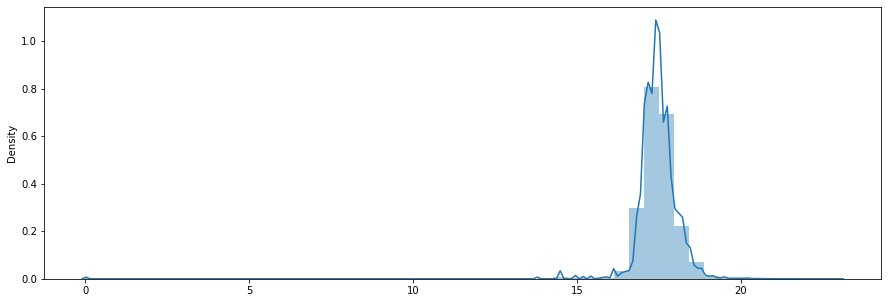

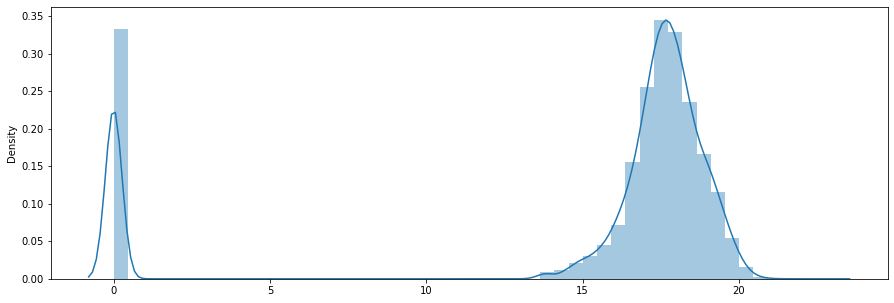

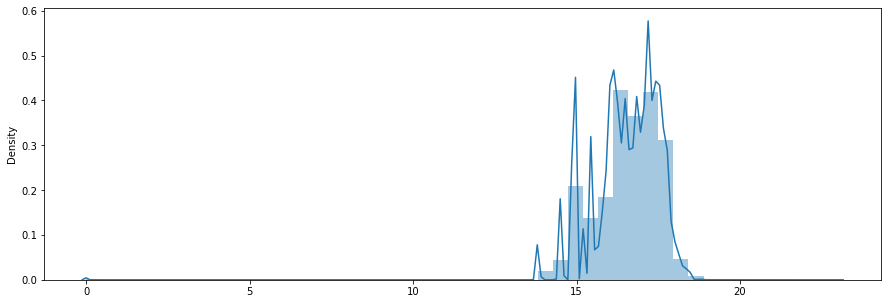

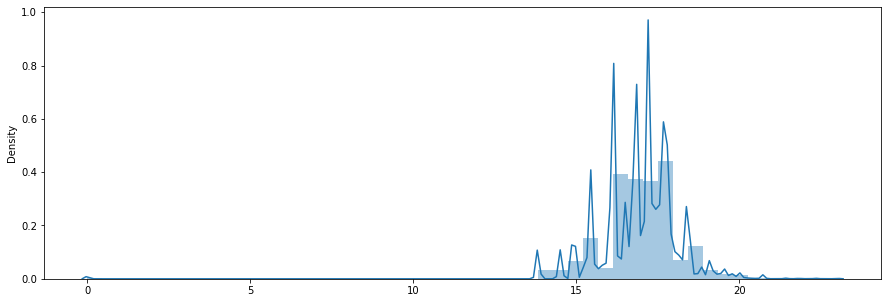

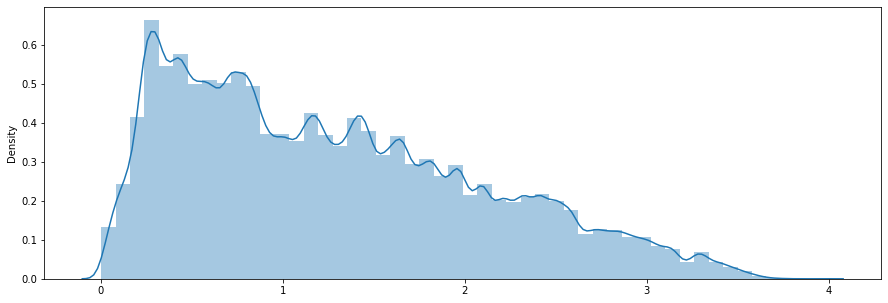

In [19]:
# 로그 변환 이후 히스토그램
columns = ['yearly_income', 'existing_loan_amt', 'loan_limit', 'desired_amount', 'work_time']

for columns in columns:
    plt.figure(figsize=(15,5))
    sns.distplot(x=df[columns])
    plt.show()

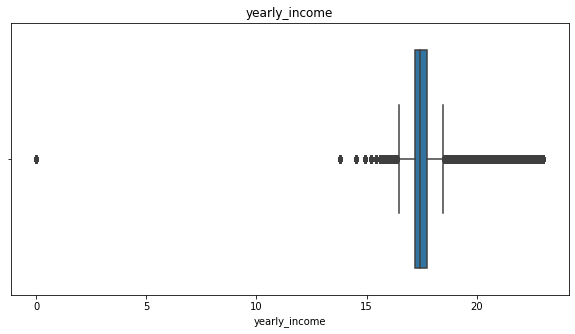

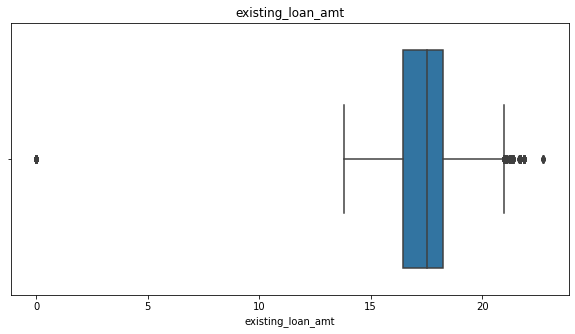

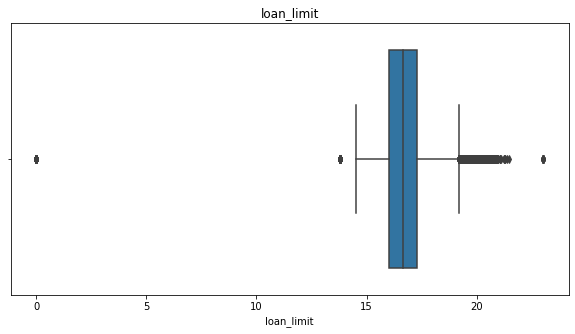

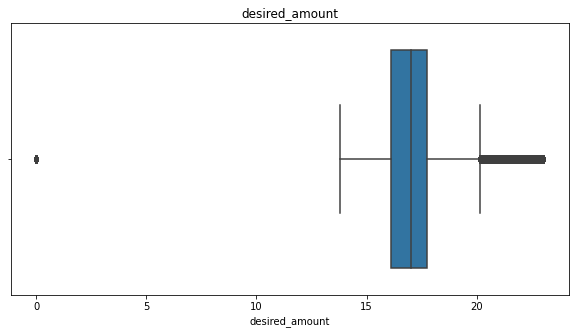

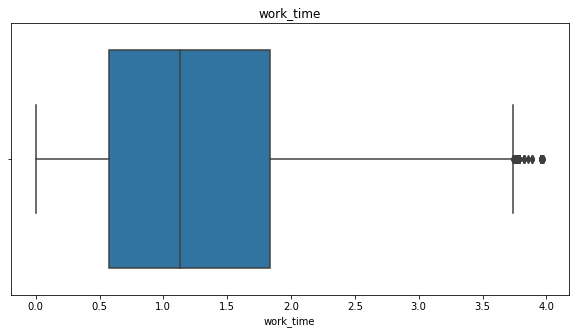

In [20]:
# 로그 변환 이후 박스플랏
columns = ['yearly_income', 'existing_loan_amt', 'loan_limit', 'desired_amount', 'work_time']

for columns in columns:
    plt.figure(figsize=(10,5))
    plt.title(columns)
    sns.boxplot(x=df[columns])
    plt.show()

In [18]:
columns = ['yearly_income', 'existing_loan_amt', 'loan_limit', 'desired_amount', 'loan_limit']

df[columns].describe()

,yearly_income,existing_loan_amt,loan_limit,desired_amount,loan_limit
count,8.064176e+06,8.064176e+06,8.064176e+06,8.064176e+06,8.064176e+06
mean,1.746372e+01,1.501190e+01,1.653452e+01,1.692231e+01,1.653452e+01
std,7.316459e-01,6.428196e+00,1.020108e+00,1.284500e+00,1.020108e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.721671e+01,1.645457e+01,1.601274e+01,1.611810e+01,1.601274e+01
50%,1.742643e+01,1.750439e+01,1.664872e+01,1.703439e+01,1.664872e+01
75%,1.772753e+01,1.825816e+01,1.728125e+01,1.772753e+01,1.728125e+01
max,2.302585e+01,2.273977e+01,2.302585e+01,2.302585e+01,2.302585e+01


<AxesSubplot:xlabel='work_time', ylabel='Density'>

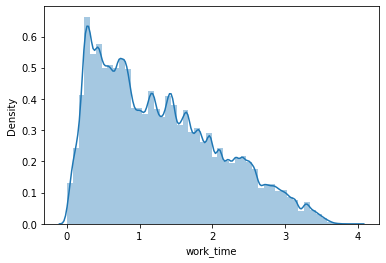

In [30]:
df['work_time'] = np.log1p(df['work_time'])
sns.distplot(df['work_time'])

In [36]:
df['credit_score'].describe()

count    8.064176e+06
mean     7.465125e+02
std      1.269183e+02
min      1.000000e+02
25%      6.400000e+02
50%      7.300000e+02
75%      8.500000e+02
max      1.000000e+03
Name: credit_score, dtype: float64

### 03.4.2 이상치 제거

In [21]:
q3=df['yearly_income'].quantile(0.75)
q1=df['yearly_income'].quantile(0.25)
iqr=q3-q1
df=df[(df['yearly_income']<q3+1.5*iqr)&(df['yearly_income']>q1-1.5*iqr)]

In [24]:
columns = ['credit_score', 'existing_loan_amt', 'loan_limit', 'desired_amount', 'work_time']

for column in columns:
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    iqr = q3 - q1
    df = df[(df[column] < q3 + 1.5 * iqr) & (df[column] > q1 - 1.5*iqr)]

df.shape

(6408955, 19)

### 03.4.3 to_csv

In [53]:
# 스케일링 이전 CSV 내보내기
df.to_csv('df.csv', index=False)

In [51]:
df.head()

,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1.0,670,17.727533,2,4,1,17.034386,1,0.0,0.0,3.0,18.146244,14.914124,14.500000,0.0,1,4,0.438697,2
2,1.0,540,17.504391,1,1,1,16.523561,2,1.0,0.0,2.0,17.974394,17.216707,17.906250,1.0,1,4,1.313871,3
3,1.0,710,17.399029,1,1,4,16.380461,2,0.0,0.0,2.0,17.147715,16.012735,9.398438,0.0,1,2,0.683512,2
4,1.0,710,17.399029,1,1,4,16.380461,2,0.0,0.0,2.0,17.147715,16.118095,13.796875,0.0,1,2,0.683512,2
5,1.0,710,17.399029,1,1,4,16.380461,2,0.0,0.0,2.0,17.147715,16.523561,16.500000,0.0,1,2,0.683512,2


In [56]:
df.reset_index()

,index,Unnamed: 0,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,0,0,1.0,670,17.727533,2,4,1,17.034386,1,...,0.0,3.0,18.146244,14.914124,14.5,0.0,1,4,0.438697,2
1,1,2,1.0,540,17.504390,1,1,1,16.523561,2,...,0.0,2.0,17.974394,17.216707,17.9,1.0,1,4,1.313871,3
2,2,3,1.0,710,17.399029,1,1,4,16.380460,2,...,0.0,2.0,17.147715,16.012735,9.4,0.0,1,2,0.683512,2
3,3,4,1.0,710,17.399029,1,1,4,16.380460,2,...,0.0,2.0,17.147715,16.118095,13.8,0.0,1,2,0.683512,2
4,4,5,1.0,710,17.399029,1,1,4,16.380460,2,...,0.0,2.0,17.147715,16.523561,16.5,0.0,1,2,0.683512,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6408950,6408950,6898068,1.0,790,17.504390,1,1,1,16.118095,8,...,0.0,2.0,16.118095,16.951004,16.4,0.0,1,2,0.068810,0
6408951,6408951,6898069,1.0,790,17.504390,1,1,1,16.118095,8,...,0.0,2.0,16.118095,16.648724,6.3,1.0,1,2,0.068810,0
6408952,6408952,6898070,1.0,790,17.504390,1,1,1,16.118095,8,...,0.0,2.0,16.118095,17.399029,9.0,0.0,1,2,0.068810,0
6408953,6408953,6898071,1.0,790,17.504390,1,1,1,16.118095,8,...,0.0,2.0,16.118095,17.216707,17.9,0.0,1,2,0.068810,0


In [57]:
df.head()

,Unnamed: 0,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,0,1.0,670,17.727533,2,4,1,17.034386,1,0.0,0.0,3.0,18.146244,14.914124,14.5,0.0,1,4,0.438697,2
1,2,1.0,540,17.504390,1,1,1,16.523561,2,1.0,0.0,2.0,17.974394,17.216707,17.9,1.0,1,4,1.313871,3
2,3,1.0,710,17.399029,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.012735,9.4,0.0,1,2,0.683512,2
3,4,1.0,710,17.399029,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.118095,13.8,0.0,1,2,0.683512,2
4,5,1.0,710,17.399029,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.523561,16.5,0.0,1,2,0.683512,2


In [59]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [60]:
df.to_csv('df.csv', index=False)

In [61]:
df = pd.read_csv('df.csv')
df.head()

,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1.0,670,17.727533,2,4,1,17.034386,1,0.0,0.0,3.0,18.146244,14.914124,14.5,0.0,1,4,0.438697,2
1,1.0,540,17.504390,1,1,1,16.523561,2,1.0,0.0,2.0,17.974394,17.216707,17.9,1.0,1,4,1.313871,3
2,1.0,710,17.399029,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.012735,9.4,0.0,1,2,0.683512,2
3,1.0,710,17.399029,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.118095,13.8,0.0,1,2,0.683512,2
4,1.0,710,17.399029,1,1,4,16.380460,2,0.0,0.0,2.0,17.147715,16.523561,16.5,0.0,1,2,0.683512,2
